In [1]:
# ML model and feature exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import os

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# model building
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold

In [5]:
local_path = os.getcwd()
print(local_path)

file_location = '..\data\Data_Preprocessed'
    
df=pd.read_parquet(os.path.join(local_path, file_location, "df_tweets_Shashank_features_added_part1.parquet"))
df=pd.concat([df,pd.read_parquet(os.path.join(local_path, file_location, "df_tweets_Shashank_features_added_part2.parquet")) ])



c:\Users\Jithin\Desktop\erdos_fall_2021\project\ML_Model_Tweet_Prediction


In [6]:
df2 = df.copy(deep=True)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914523 entries, 0 to 914522
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   created_at                      914523 non-null  object 
 1   entities_cashtags               914523 non-null  int64  
 2   entities_hashtags               914523 non-null  int64  
 3   entities_urls                   914523 non-null  int64  
 4   public_metrics_like_count       914523 non-null  int64  
 5   public_metrics_quote_count      914523 non-null  int64  
 6   public_metrics_reply_count      914523 non-null  int64  
 7   public_metrics_retweet_count    914523 non-null  int64  
 8   text                            914523 non-null  object 
 9   entities_mentions               914523 non-null  int64  
 10  created_at_user                 914523 non-null  object 
 11  public_metrics_followers_count  914523 non-null  int64  
 12  public_metrics_f

In [8]:
df2.columns

Index(['created_at', 'entities_cashtags', 'entities_hashtags', 'entities_urls',
       'public_metrics_like_count', 'public_metrics_quote_count',
       'public_metrics_reply_count', 'public_metrics_retweet_count', 'text',
       'entities_mentions', 'created_at_user',
       'public_metrics_followers_count', 'public_metrics_following_count',
       'public_metrics_listed_count', 'public_metrics_tweet_count',
       'media_type', 'Company_name', 'Word_count_News_agencies',
       'Word_count_Henry08_pos', 'Word_count_Henry08_neg',
       'Word_count_LM11_pos', 'Word_count_LM11_neg',
       'Word_count_Hagenau13_pos', 'Word_count_Hagenau13_neg',
       'Tweet_Length_characters', 'Tweet_Length_words', 'Compound_vader',
       'Positive_vader', 'Negative_vader', 'Neutral_vader', 'Company_ticker'],
      dtype='object')

In [9]:
parameters_to_keep = ['entities_hashtags', 'entities_cashtags','entities_urls','public_metrics_followers_count',
                    'public_metrics_following_count', 'public_metrics_listed_count','public_metrics_tweet_count','media_type','entities_mentions',
                    'Word_count_Henry08_pos', 'Word_count_Henry08_neg',
                    'Word_count_LM11_pos', 'Word_count_LM11_neg',
                    'Word_count_Hagenau13_pos', 'Word_count_Hagenau13_neg',
                    'Tweet_Length_characters', 'Compound_vader','Positive_vader', 'Negative_vader', 'Neutral_vader']

for col in df2.columns:
    if col not in parameters_to_keep:
        df2=df2.drop(col,axis=1)

In [10]:
sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df2), columns=df2.columns)

In [11]:
y_likes = df["public_metrics_like_count"].apply(lambda x: 1 if x > 20  else 0 )
y_retweets= df["public_metrics_retweet_count"].apply(lambda x: 1 if x > 20  else 0 )
X = df2  
print(f'fraction of tweets more than 20 likes and those less than 20 likes: {sum(y_likes)/len(y_likes)} , {1-(sum(y_likes)/len(y_likes))}')
print(f'fraction of tweets more than 20 Retweets and those less than 20 Retweets: {sum(y_retweets)/len(y_retweets)} , {1-(sum(y_retweets)/len(y_retweets))}')



fraction of tweets more than 20 likes and those less than 20 likes: 0.5560581855240382 , 0.4439418144759618
fraction of tweets more than 20 Retweets and those less than 20 Retweets: 0.23744946819270812 , 0.7625505318072918


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y_likes,
                                                    test_size = .2,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y_likes)



In [13]:
X_train.head()

,entities_cashtags,entities_hashtags,entities_urls,entities_mentions,public_metrics_followers_count,public_metrics_following_count,public_metrics_listed_count,public_metrics_tweet_count,media_type,Word_count_Henry08_pos,Word_count_Henry08_neg,Word_count_LM11_pos,Word_count_LM11_neg,Word_count_Hagenau13_pos,Word_count_Hagenau13_neg,Tweet_Length_characters,Compound_vader,Positive_vader,Negative_vader,Neutral_vader
133053,-0.174954,-0.377196,-0.472546,-0.400621,2.091887,-0.101726,2.040775,1.357856,-0.827898,-0.447282,-0.317411,-0.447356,0.720007,2.073967,-0.349027,1.595979,-0.429544,-0.812741,-0.248039,0.834401
613490,-0.174954,-0.377196,-2.163424,-0.400621,-0.730703,-0.205392,-0.799133,-1.374329,-0.827898,-0.447282,-0.317411,-0.447356,-0.578010,-0.344208,-0.349027,-0.263533,-1.477485,-0.812741,0.761876,0.110384
228,1.165580,-0.377196,-0.472546,-0.400621,-0.773852,-0.175591,-0.779019,-1.166205,-0.827898,-0.447282,-0.317411,-0.447356,0.720007,-0.344208,-0.349027,-0.853134,-0.178791,-0.812741,-0.642719,1.117350
67174,-0.174954,-0.377196,1.218331,-0.400621,2.091893,-0.101726,2.040775,1.357885,1.207878,-0.447282,-0.317411,-0.447356,-0.578010,-0.344208,-0.349027,-0.853134,0.802494,1.381478,-0.642719,-0.655243
859799,-0.174954,-0.377196,-0.472546,1.324856,-0.278052,-0.143371,-0.907135,0.213321,-0.827898,-0.447282,-0.317411,-0.447356,-0.578010,-0.344208,-0.349027,-0.671719,-0.178791,-0.812741,-0.642719,1.117350


array([[<AxesSubplot:title={'center':'entities_cashtags'}>,
        <AxesSubplot:title={'center':'entities_hashtags'}>,
        <AxesSubplot:title={'center':'entities_urls'}>,
        <AxesSubplot:title={'center':'entities_mentions'}>],
       [<AxesSubplot:title={'center':'public_metrics_followers_count'}>,
        <AxesSubplot:title={'center':'public_metrics_following_count'}>,
        <AxesSubplot:title={'center':'public_metrics_listed_count'}>,
        <AxesSubplot:title={'center':'public_metrics_tweet_count'}>],
       [<AxesSubplot:title={'center':'media_type'}>,
        <AxesSubplot:title={'center':'Word_count_Henry08_pos'}>,
        <AxesSubplot:title={'center':'Word_count_Henry08_neg'}>,
        <AxesSubplot:title={'center':'Word_count_LM11_pos'}>],
       [<AxesSubplot:title={'center':'Word_count_LM11_neg'}>,
        <AxesSubplot:title={'center':'Word_count_Hagenau13_pos'}>,
        <AxesSubplot:title={'center':'Word_count_Hagenau13_neg'}>,
        <AxesSubplot:title={'center

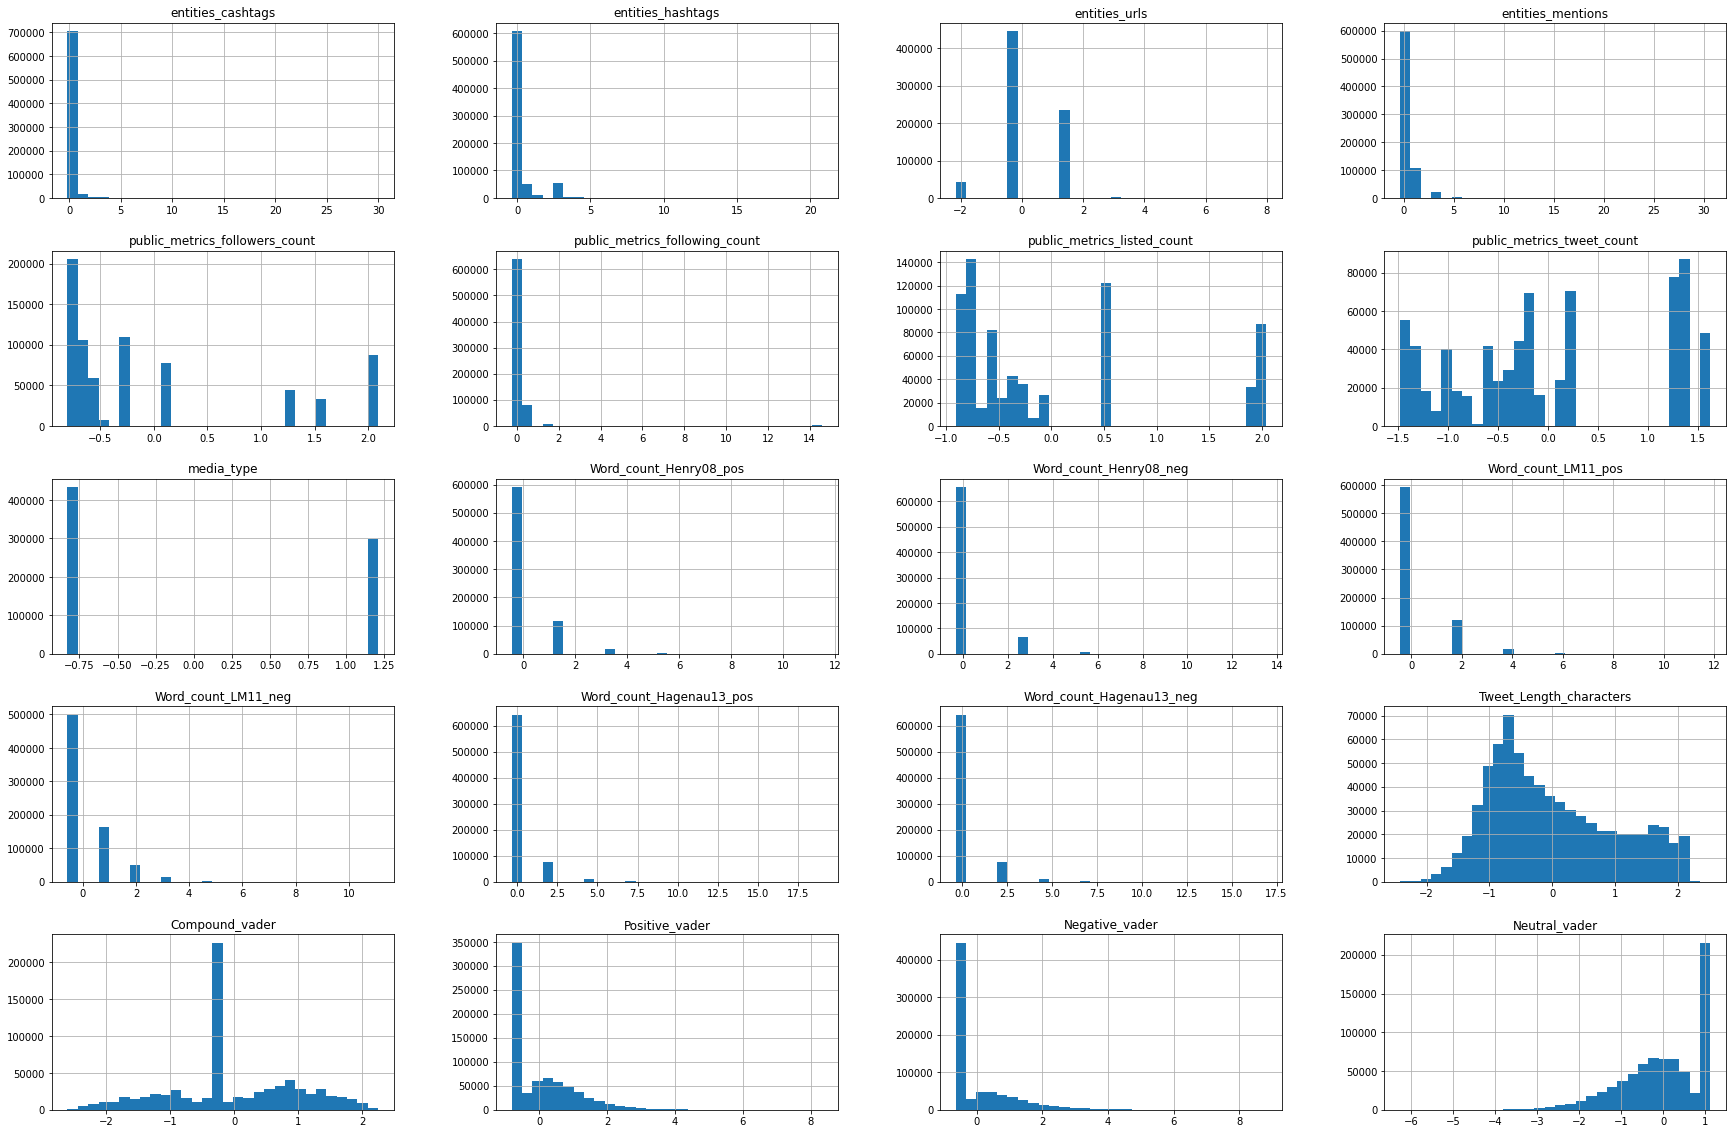

In [14]:
X_train.hist(bins=30, figsize=(30, 20))

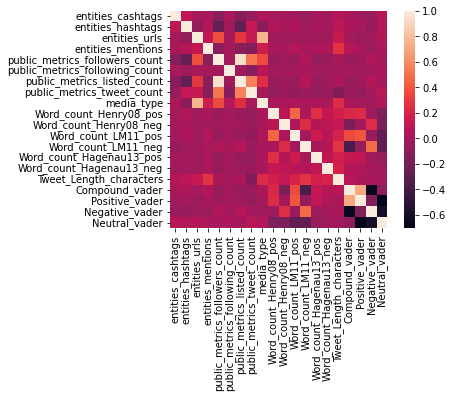

In [15]:
corrmat = X_train.corr()
sns.heatmap(corrmat, vmax=1.0, square=True);

# Light Gradient boosting model

In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

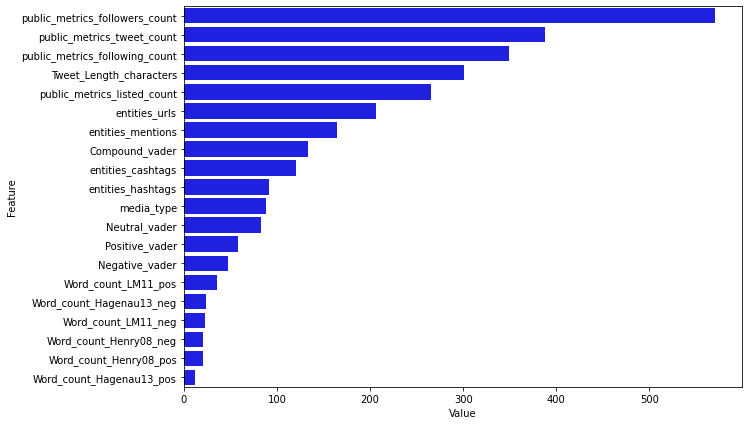

In [ ]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 7))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:], color='blue');

In [ ]:
predictions = clf.predict(X_test)


In [ ]:
class_report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print ('report :', class_report)
print('accuracy :',accuracy)
print('f1_score ', f1_score(y_test, predictions, average='weighted'))

report :               precision    recall  f1-score   support

           0       0.87      0.81      0.84     81199
           1       0.86      0.90      0.88    101706

    accuracy                           0.86    182905
   macro avg       0.86      0.86      0.86    182905
weighted avg       0.86      0.86      0.86    182905

accuracy : 0.8633060878598179
f1_score  0.8627156512784093


[[65971 15228]
 [ 9774 91932]]


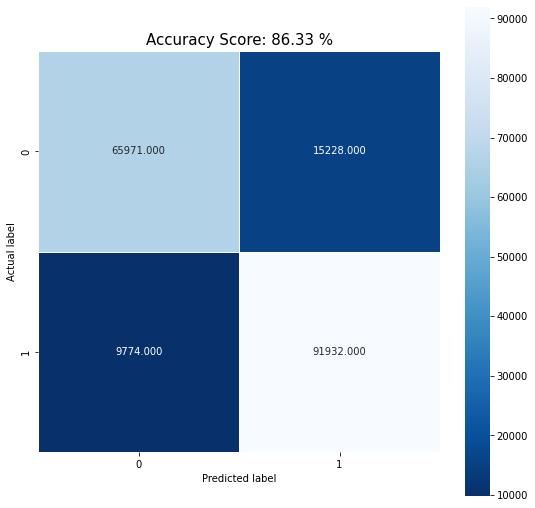

In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} %'.format(round(accuracy*100, 2))
plt.title(all_sample_title, size = 15)
plt.show()

# Logistic regression


In [20]:
# Logistic regression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
lr_predictions  = logisticRegr.predict(X_test)

Feature: 0 entities_cashtags, Score: 0.011079226071824681
Feature: 1 entities_hashtags, Score: -0.13541324357202705
Feature: 2 entities_urls, Score: -0.7050317465960536
Feature: 3 entities_mentions, Score: -0.07435734317488107
Feature: 4 public_metrics_followers_count, Score: 1.6598346632370626
Feature: 5 public_metrics_following_count, Score: 0.15061714081561114
Feature: 6 public_metrics_listed_count, Score: 0.04875833980904273
Feature: 7 public_metrics_tweet_count, Score: -0.22062789734380306
Feature: 8 media_type, Score: 0.4709801568288177
Feature: 9 Word_count_Henry08_pos, Score: 0.009543257739196143
Feature: 10 Word_count_Henry08_neg, Score: -0.023785909736232527
Feature: 11 Word_count_LM11_pos, Score: -0.006754655220018268
Feature: 12 Word_count_LM11_neg, Score: 0.015018704503027173
Feature: 13 Word_count_Hagenau13_pos, Score: -0.04138803058282191
Feature: 14 Word_count_Hagenau13_neg, Score: -0.05496858761203485
Feature: 15 Tweet_Length_characters, Score: 0.15027797101987958
Feat

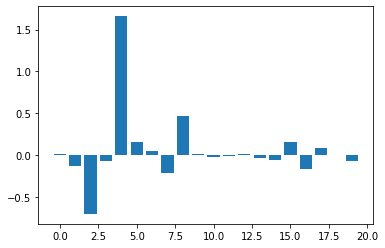

In [ ]:
importance = logisticRegr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: {} {}, Score: {}'.format(i, df2.columns[i], v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

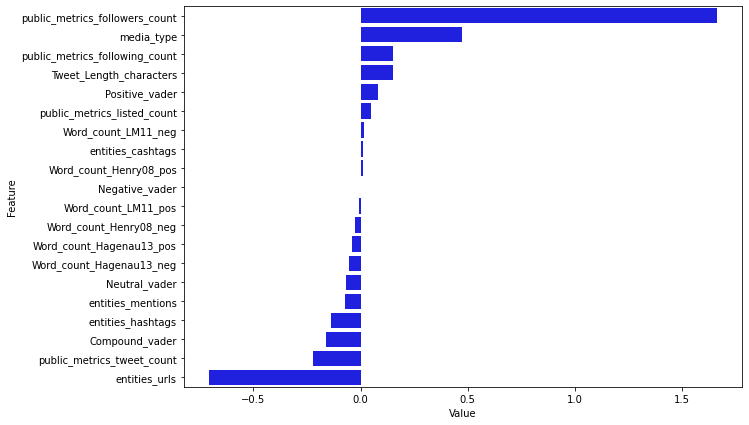

In [ ]:
lr_feature_imp = pd.DataFrame(sorted(zip(logisticRegr.coef_[0],X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 7))
sns.barplot(x="Value", y="Feature", data=lr_feature_imp.sort_values(by="Value", ascending=False)[:], color='blue');

In [ ]:
lr_class_report = classification_report(y_test, lr_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print ('report :', lr_class_report)
print('accuracy :',lr_accuracy)
print('f1_score ', f1_score(y_test, lr_predictions, average='weighted'))

report :               precision    recall  f1-score   support

           0       0.68      0.77      0.72     81199
           1       0.80      0.71      0.75    101706

    accuracy                           0.74    182905
   macro avg       0.74      0.74      0.74    182905
weighted avg       0.75      0.74      0.74    182905

accuracy : 0.739717339602526
f1_score  0.7405372262626146


[[62653 18546]
 [29061 72645]]


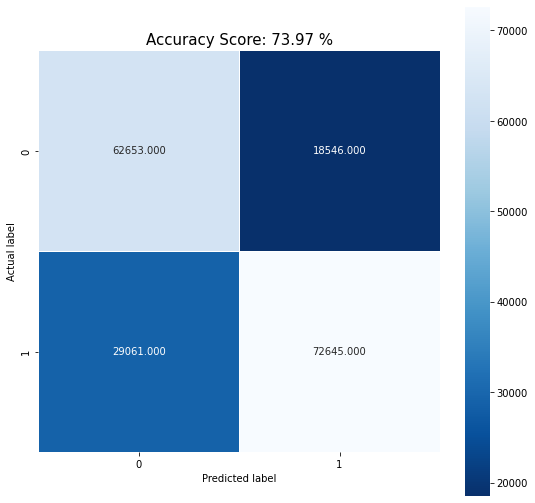

In [ ]:
lr_cm = confusion_matrix(y_test, lr_predictions)
print(lr_cm)
plt.figure(figsize=(9,9))
sns.heatmap(lr_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} %'.format(round(lr_accuracy*100, 2))
plt.title(all_sample_title, size = 15)
plt.show()

# Naive Bayes model

In [16]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
nb_predictions  = naiveBayes.predict(X_test)

report :               precision    recall  f1-score   support

           0       0.61      0.86      0.71     81199
           1       0.83      0.56      0.67    101706

    accuracy                           0.69    182905
   macro avg       0.72      0.71      0.69    182905
weighted avg       0.73      0.69      0.69    182905

accuracy : 0.694688499494273
f1_score  0.6910057276742343
f1_score  0.6910057276742343
[[69661 11538]
 [44305 57401]]


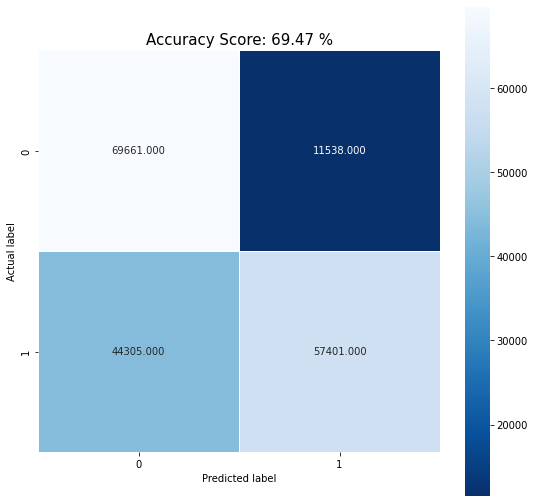

In [19]:
class_report = classification_report(y_test, nb_predictions)
accuracy = accuracy_score(y_test, nb_predictions)

print ('report :', class_report)
print('accuracy :',accuracy)
print('f1_score ', f1_score(y_test, nb_predictions, average='weighted'))
print('f1_score ', f1_score(y_test, nb_predictions, average='weighted'))

cm = confusion_matrix(y_test, nb_predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} %'.format(round(accuracy*100, 2))
plt.title(all_sample_title, size = 15)
plt.show()

In [17]:
imps = permutation_importance(naiveBayes, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
features = X_test.columns
# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. public_metrics_followers_count (0.056249)
2. public_metrics_listed_count (0.048916)
3. entities_hashtags (0.004489)
4. public_metrics_tweet_count (0.003557)
5. entities_urls (0.001996)
6. public_metrics_following_count (0.001636)
7. entities_mentions (0.001593)
8. Word_count_LM11_neg (0.001463)
9. entities_cashtags (0.000957)
10. Compound_vader (0.000470)
11. Negative_vader (0.000389)
12. Word_count_Hagenau13_neg (0.000044)
13. Tweet_Length_characters (0.000020)
14. Positive_vader (-0.000020)
15. Word_count_LM11_pos (-0.000081)
16. Neutral_vader (-0.000096)
17. Word_count_Henry08_neg (-0.000126)
18. Word_count_Hagenau13_pos (-0.000138)
19. Word_count_Henry08_pos (-0.000195)
20. media_type (-0.001136)


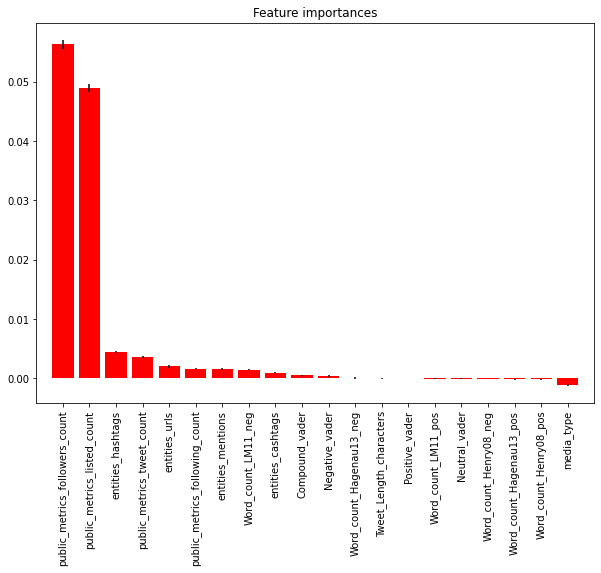

In [18]:
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [features[indices[i]] for i in range(20)] , rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()
